## Training MNIST using convnet

- Stop training process using callbacks when train accuracy reach 99.8%
- Evaluate model on test set
- Predict on test images for verification 
- Train data size = 60000 and Test data size = 10000


In [1]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

1.14.0


In [0]:
# Load MMNIST dataset, reshape and normalize training and test images
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images.reshape(60000,28,28,1)
training_images = training_images / 255.0

test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0


In [0]:
# define callback 
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.998):
      print("\nReached 99.8% train accuracy so cancelling further training!")
      self.model.stop_training = True

callbacks = mycallback()      

In [4]:
# define model archtitecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
# train model
model.fit(training_images, training_labels, epochs=20, callbacks=[callbacks])

Epoch 1/20
60000/60000 [==============================] - 13s 220us/sample - loss: 0.1389 - acc: 0.9592
Epoch 2/20
60000/60000 [==============================] - 10s 172us/sample - loss: 0.0490 - acc: 0.9849
Epoch 3/20
60000/60000 [==============================] - 10s 171us/sample - loss: 0.0294 - acc: 0.9908
Epoch 4/20
60000/60000 [==============================] - 10s 173us/sample - loss: 0.0191 - acc: 0.9939
Epoch 5/20
60000/60000 [==============================] - 10s 172us/sample - loss: 0.0130 - acc: 0.9959
Epoch 6/20
60000/60000 [==============================] - 10s 172us/sample - loss: 0.0093 - acc: 0.9969
Epoch 7/20
60000/60000 [==============================] - 10s 173us/sample - loss: 0.0071 - acc: 0.9977
Epoch 8/20
60000/60000 [==============================] - 10s 172us/sample - loss: 0.0067 - acc: 0.9979
Epoch 9/20
59872/60000 [============================>.] - ETA: 0s - loss: 0.0050 - acc: 0.9983
Reached 99.8% train accuracy so cancelling further training!
60000/60000 

In [7]:
# model evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("\nTest accuracy={}".format(test_acc))

10000/10000 [==============================] - 1s 89us/sample - loss: 0.0565 - acc: 0.9862

Test accuracy=0.9861999750137329



Ground Truth=9

Model Prediction=9

Prediction Prob=0.9999973773956299


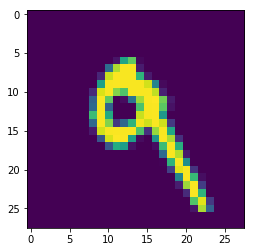

In [35]:
# run prediction on test images to verify accuracy
import matplotlib.pyplot as plt

#test_image = np.expand_dims(test_images[1], axis=0)
prediction = model.predict(np.expand_dims(test_images[7],axis=0))
plt.imshow(test_images[7].reshape(28,28))

print("\nGround Truth={}".format(test_labels[7]))
print("\nModel Prediction={}".format(np.argmax(prediction)))
print("\nPrediction Prob={}".format(np.max(prediction)))